IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:

student_depression_file_path = '../datasets/student_depression.csv'
student_depression_data = pd.read_csv(student_depression_file_path)


# Display the first few rows of the dataset
student_depression_data.head()





,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Display data description
student_depression_data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [4]:
# Display data information
student_depression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

DATA DESCRIPTION

Features:
- ID: Unique identifier for each student
- Demographics: Age, Gender, City
- Academic Indicators: CGPA, Academic Pressure, Study Satisfaction
- Lifestyle & Wellbeing: Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours
- Additional Factors: Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the student has ever had suicidal thoughts

Target Variable:
- Depression_Status: A binary indicator (0/1 or Yes/No) that denotes whether a student is experiencing depression


Data information shows that there is no Null values of every features

In [5]:
object_columns = student_depression_data.select_dtypes(include=['object','float64','int64']).columns
# Display unique values in object columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(student_depression_data[column].unique())
    print()

Unique values in 'id':
[     2      8     26 ... 140689 140690 140699]

Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Age':
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]

Unique values in 'City':
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Unique values in 'Profession':
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Man

DATA TRANSFORMATION

After inspecting each feature of data, we can see that:
- There is no null or NA of every features. So we don't have to handle missing values of data
- At 'City' feature, there are some incorrect, irrelevant values such as:
    - '3.0'
    - 'City'
    - 'Less than 5 Kalyan' => Kalyan city is already mentioned
    - 'ME' => this could be Master of Engineering in 'Profession' column
    - 'M.Com' => this could be Master of Commerce in 'Profession' column
- At 'Financial Stress' feature, there are some rows that contain '?' value. Which could stand for 'Null' or 'Not available'
- We only care about Student so we can drop all rows that are not student in Profession, and then remove Profession column
- There are ambiguous like '?' values in 'Financial Stress' column, 'Other' in 'Degree', 'Dietary Habits', 'Sleep Duration'

In [6]:
others_count = student_depression_data[student_depression_data['Degree'] == 'Others'].shape[0] + student_depression_data[student_depression_data['Dietary Habits'] == 'Others'].shape[0] + student_depression_data[student_depression_data['Sleep Duration'] == 'Others'].shape[0] 
print(others_count)

65


=> There are total 65 'Others' value across those columns. So we can drop all of those without causing so much bias to our data

In [7]:
student_depression_data = student_depression_data[student_depression_data['Degree'] != 'Others']
student_depression_data = student_depression_data[student_depression_data['Dietary Habits'] != 'Others']
student_depression_data = student_depression_data[student_depression_data['Sleep Duration'] != 'Others']



In [8]:
city_irrelevant_value = ['3.0', 'City',"'Less than 5 Kalyan'",'ME', 'M.Com','M.Tech', "'Less Delhi'"]
# Count number of irrelevant values in the 'City' column
city_irrelevant_count = student_depression_data['City'].isin(city_irrelevant_value).sum()
print(f"Number of irrelevant values in 'City' column: {city_irrelevant_count}")

financial_stress_irrelevant_value = ['?']
# Count number of irrelevant values in the 'Financial Stress' column
financial_stress_irrelevant_count = student_depression_data['Financial Stress'].isin(financial_stress_irrelevant_value).sum()
print(f"Number of irrelevant values in 'Financial Stress' column: {financial_stress_irrelevant_count}")


# Change Have you ever had suicidal thoughts ? to 1 and 0
student_depression_data['Have you ever had suicidal thoughts ?'] = student_depression_data['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})

# Change Family History of Mental Illness to 1 and 0
student_depression_data['Family History of Mental Illness'] = student_depression_data['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

# Choose students only in Profession column
# Remove the 'Profession' column from the dataset
student_depression_data =  student_depression_data[student_depression_data['Profession'] == 'Student'].drop(columns=['Profession'])

# Remove id column
student_depression_data = student_depression_data.drop(columns=['id'])



## Display the first few rows of the modified dataset
student_depression_data.head()


Number of irrelevant values in 'City' column: 8
Number of irrelevant values in 'Financial Stress' column: 3


/tmp/ipykernel_340980/2666442376.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_depression_data['Have you ever had suicidal thoughts ?'] = student_depression_data['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_340980/2666442376.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_depression_data['Family History of Mental Illness'] = student_depression_data['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})


,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,0,3.0,2.0,1,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,0,9.0,1.0,1,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,1,4.0,5.0,1,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,1,1.0,1.0,0,0


The number of irrelevant, incorrect values in datasets of 'City' and 'Financial Stress' columns is trivial. So we are dropping those irrelevant values

In [9]:
# Drop irrelevant values in 'City' column
student_depression_data = student_depression_data[~student_depression_data['City'].isin(city_irrelevant_value)]
# Drop irrelevant values in 'Financial Stress' column
student_depression_data = student_depression_data[~student_depression_data['Financial Stress'].isin(financial_stress_irrelevant_value)]




DATA VISUALIZATION

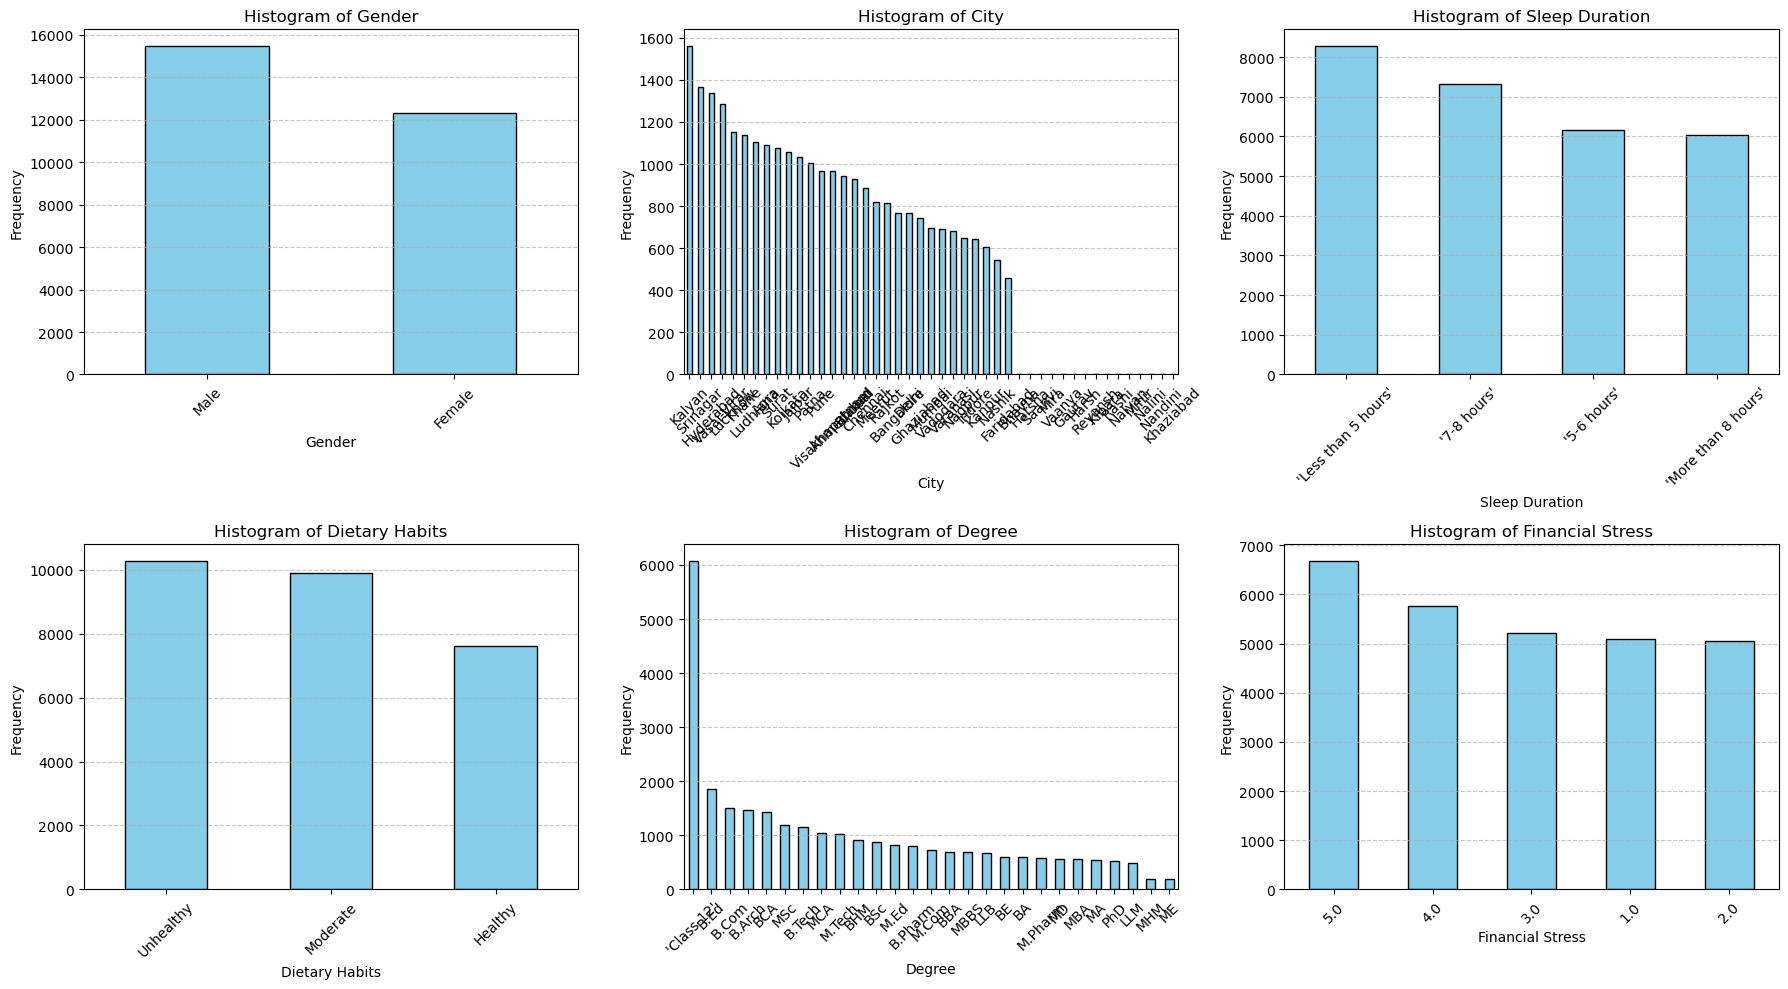

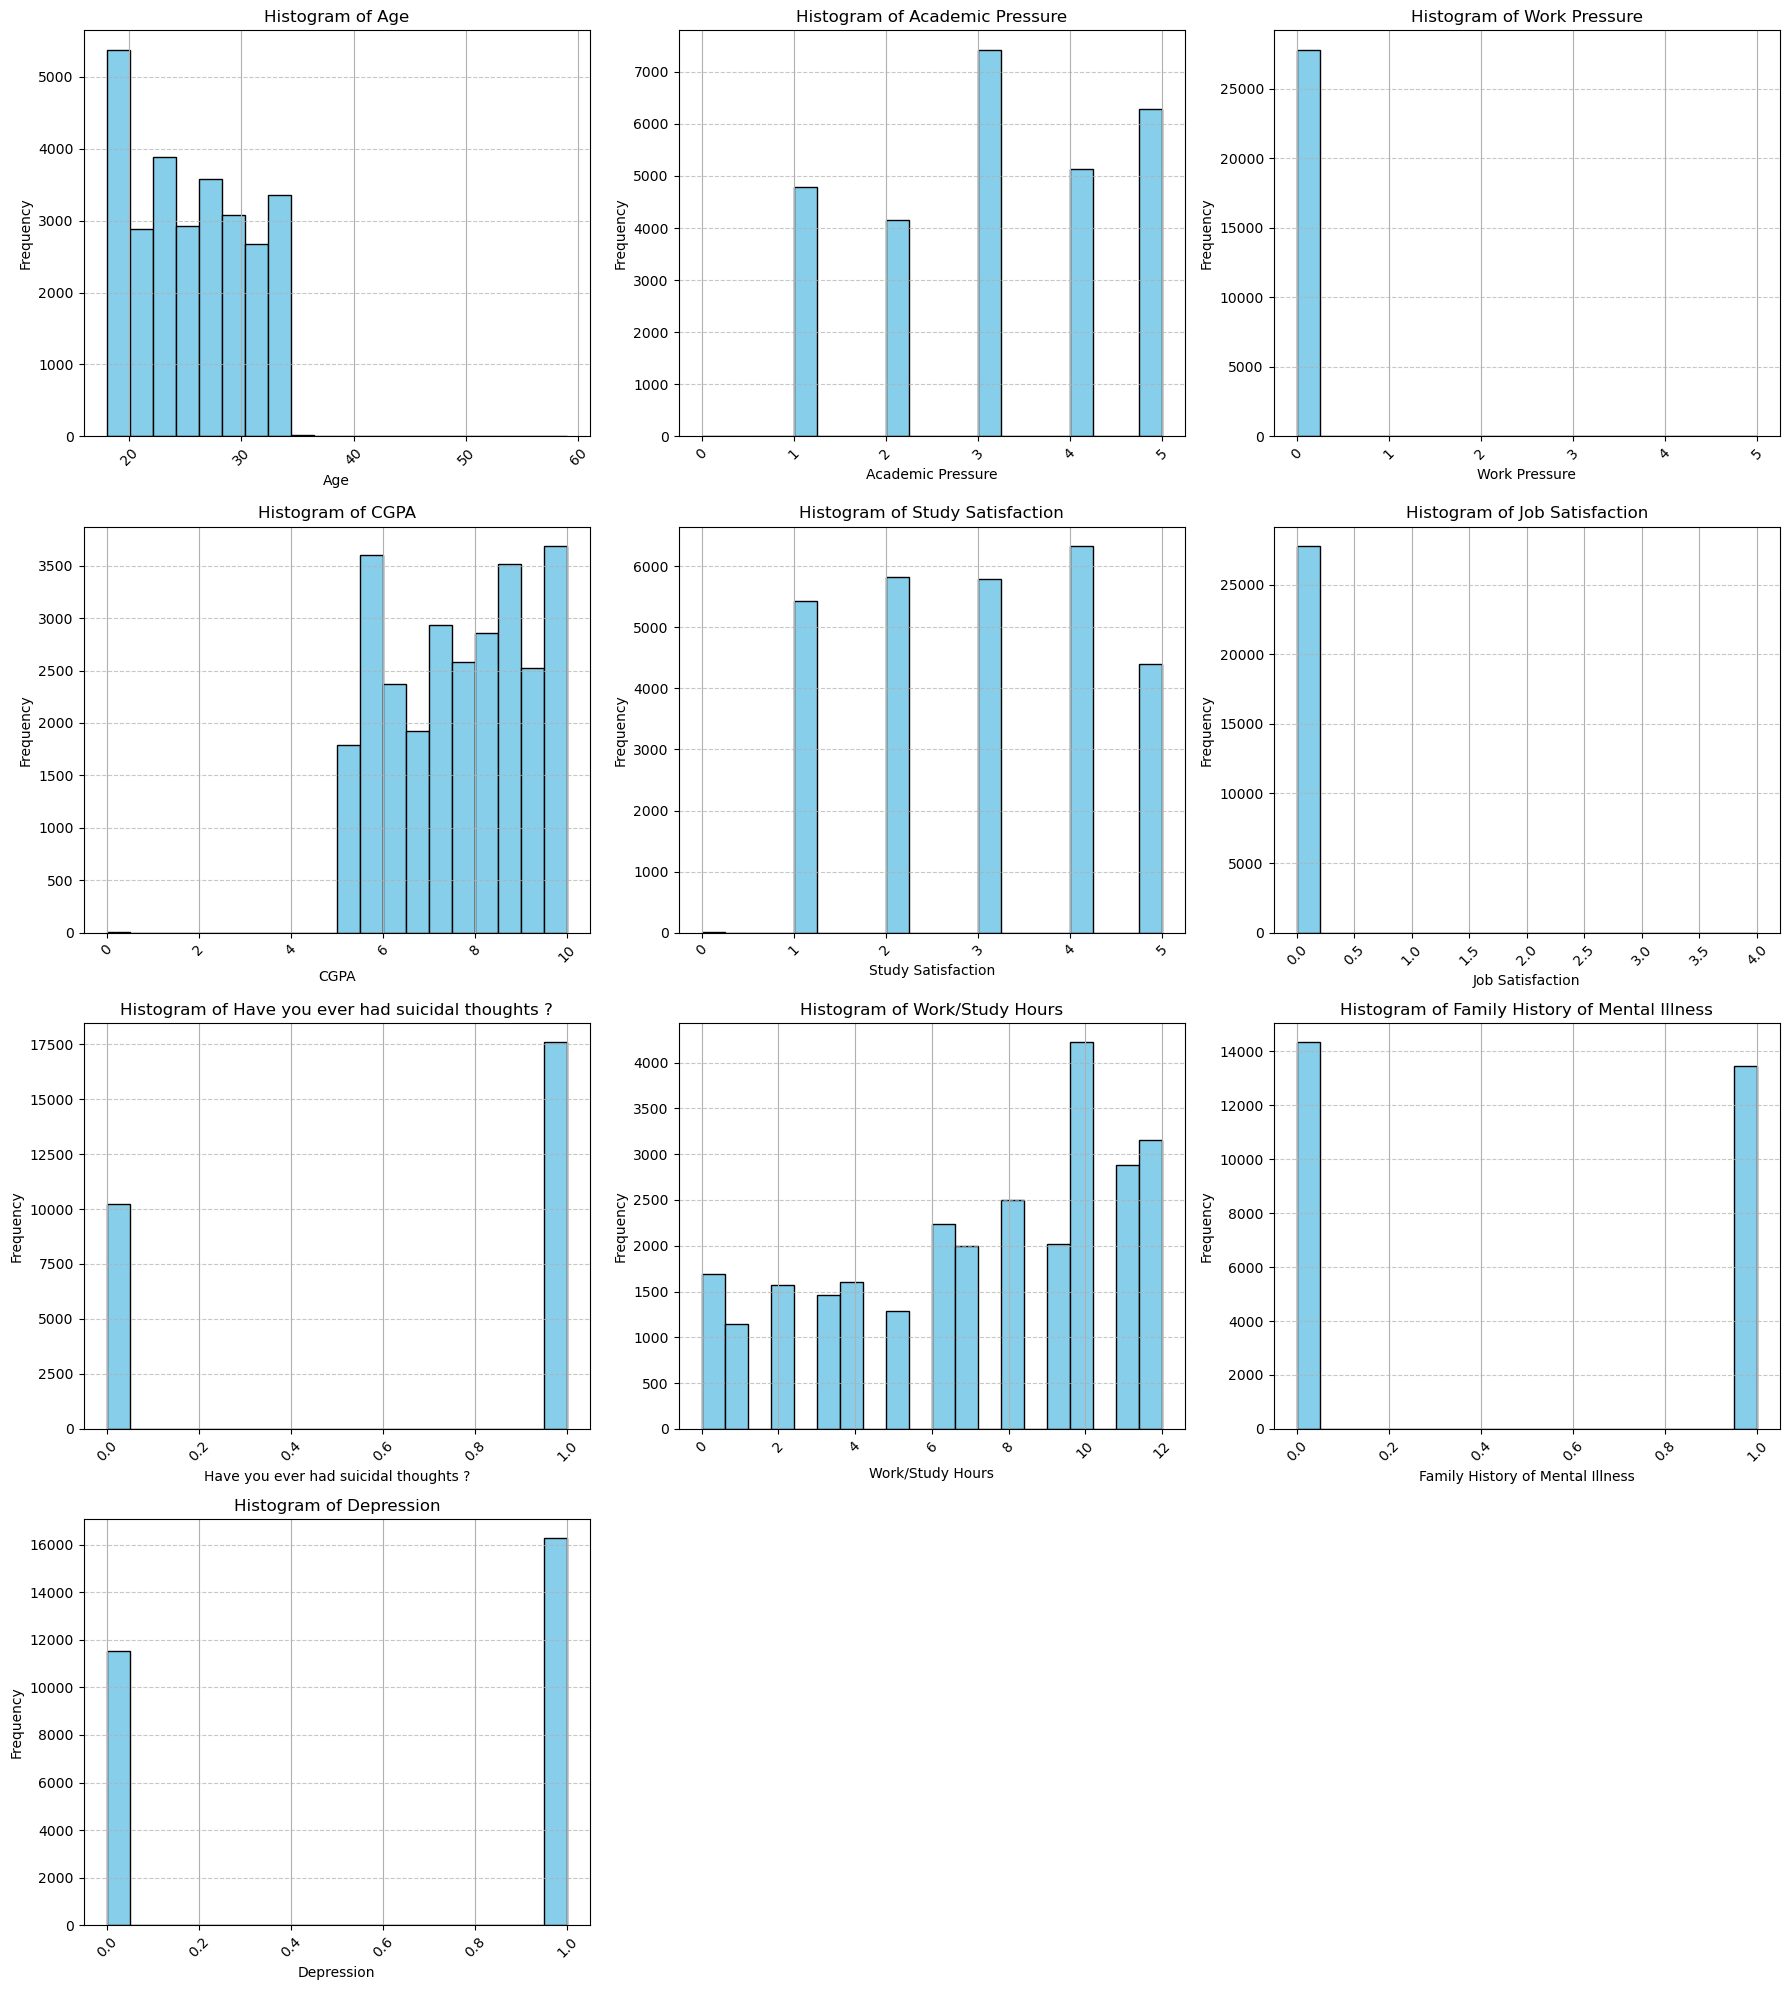

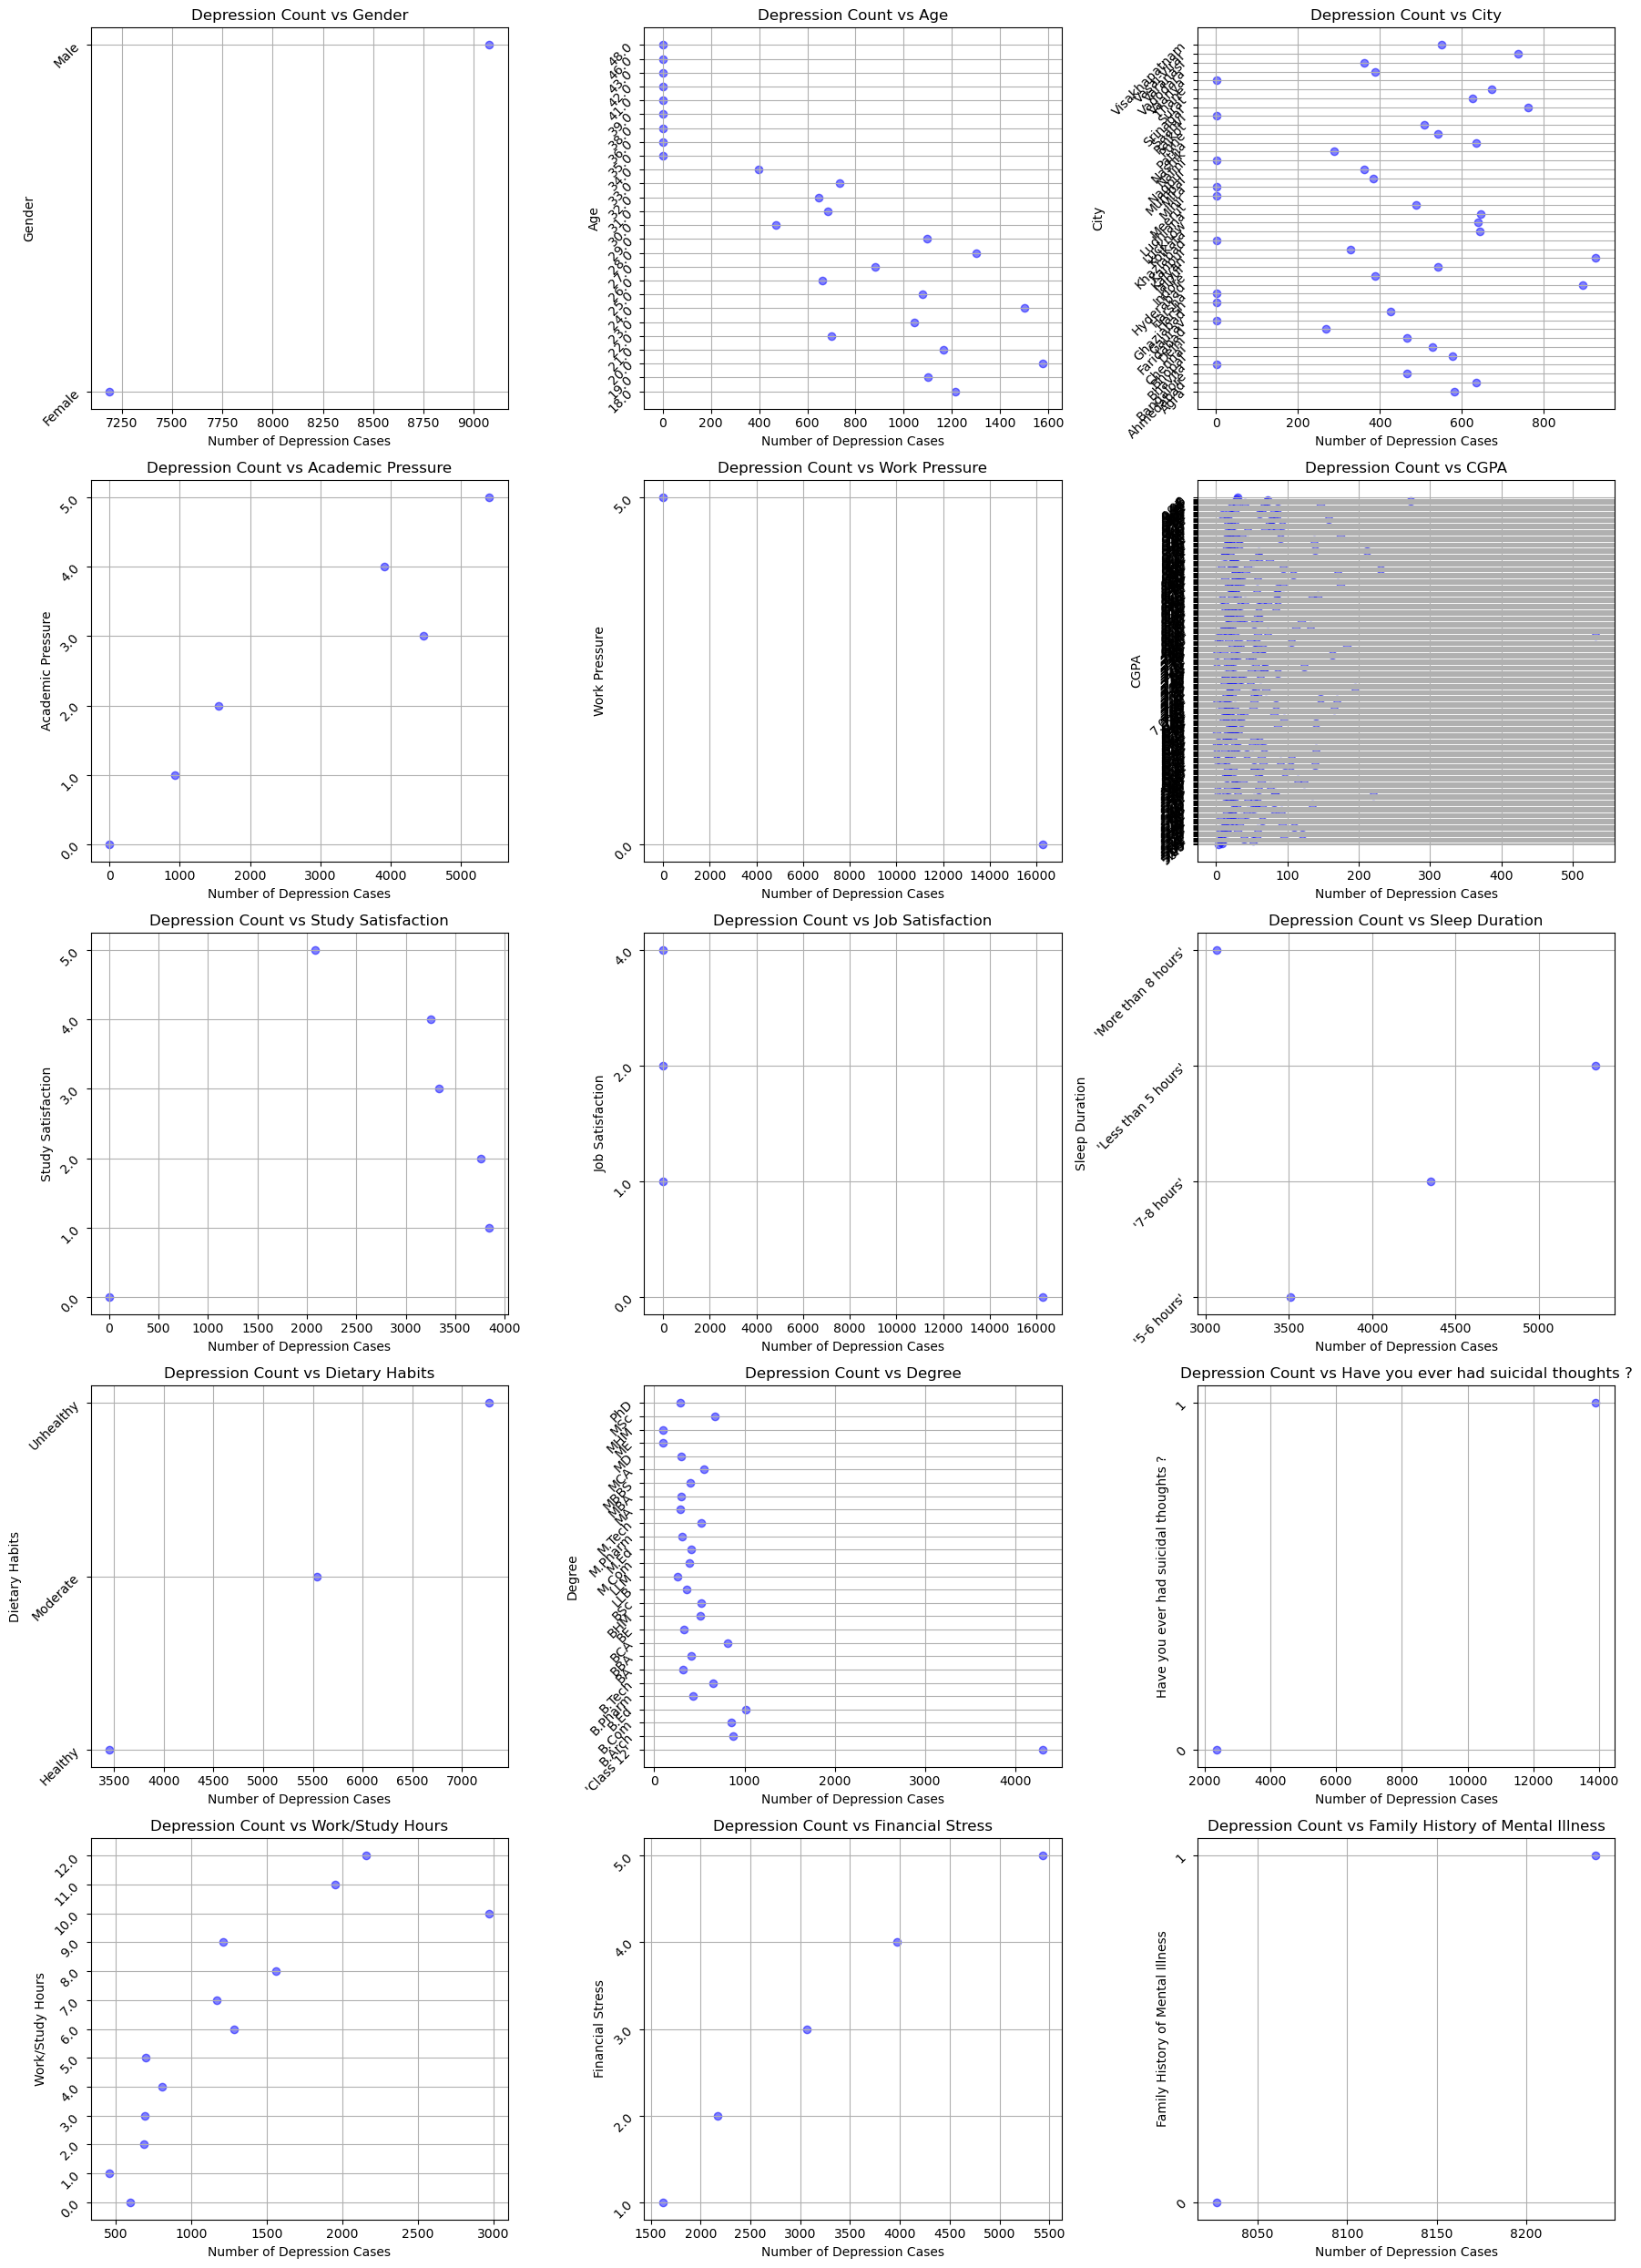

In [10]:
# ---------- HISTOGRAM PLOTS ----------

def plot_histograms_in_grid(columns, is_categorical=True):
    num_columns = len(columns)
    cols_per_row = 3
    rows = math.ceil(num_columns / cols_per_row)

    fig, axs = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 5))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        ax = axs[i]
        if is_categorical:
            student_depression_data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
        else:
            student_depression_data[column].hist(bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=45)

    # Hide empty subplots if any
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Categorical histograms
categorical_columns = student_depression_data.select_dtypes(include=['object']).columns
plot_histograms_in_grid(categorical_columns, is_categorical=True)

# Non-categorical histograms
non_categorical_columns = student_depression_data.select_dtypes(exclude=['object']).columns
plot_histograms_in_grid(non_categorical_columns, is_categorical=False)

# ---------- SCATTER PLOTS (DEPRESSION VS OTHER FEATURES) ----------

def plot_depression_scatter_in_grid(columns):
    cols_per_row = 3
    rows = math.ceil(len(columns) / cols_per_row)

    fig, axs = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 5))
    axs = axs.flatten()

    for i, column in enumerate(columns):
        ax = axs[i]
        depression_count = (
            student_depression_data[student_depression_data['Depression'] == 1]
            .groupby(column)
            .size()
            .reset_index(name='Number of Depression')
        )

        # Convert x-axis values to string for consistency in categorical-like features
        depression_count[column] = depression_count[column].astype(str)

        ax.scatter(depression_count['Number of Depression'], depression_count[column], alpha=0.5, color='blue')
        ax.set_title(f'Depression Count vs {column}')
        ax.set_xlabel('Number of Depression Cases')
        ax.set_ylabel(column)
        ax.tick_params(axis='y', rotation=45)
        ax.grid(True)

    # Hide empty subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# All other features except 'Depression' and 'id'
numerical_columns = student_depression_data.select_dtypes(include=['int64', 'float64', 'object']).columns
filtered_columns = [col for col in numerical_columns if col not in ['Depression', 'id']]
plot_depression_scatter_in_grid(filtered_columns)

FEATURE SELECTION

- By visualizing Student Depression data, we can see that:
    - In 'Degree' column, 'Class 12' students seems to have highest depression among all degrees. However, the number of 'Class 12' student is much more that other degrees, so by using 'Degree' feature for our model, it could causes bias toward 'Class 12' student. So we remove 'Degree' feature out of the training data.
    - In 'Job Satisfaction' column, most of the data is '0.0'. It also causes bias toward people who is 'Unsatisfied with the job'. So we remove 'Job Satisfaction' feature out of the training data
    - The same with 'Work Pressure' as 'Job Satisfaction'

In [11]:
preprocessed_student_depression_file_path = '../datasets/preprocessed_student_depression.csv'
preprocessed_student_depression_data = student_depression_data.drop(columns=['Degree','Job Satisfaction','Work Pressure'])
preprocessed_student_depression_data.to_csv(preprocessed_student_depression_file_path, index=False)
print(f"Preprocessed data saved to {preprocessed_student_depression_file_path}")


Preprocessed data saved to ../datasets/preprocessed_student_depression.csv
